# Decision Trees

### Tujuan
- mampu menggunakan Decision Tree untuk kasus klasisfikasi

#### Import Library 

In [38]:
# Mengimpor library yang kita butuhkan 

import numpy as np # untuk perhitungan
import pandas as pd # untuk memanipulasi data

## membuat model decision tree
from sklearn.tree import DecisionTreeClassifier 
import sklearn.tree as tree 

#### Membaca Data

In [149]:
# Membaca data dari file .csv
data = pd.read_csv("mushrooms_dataset.csv")

# Menampilakn 4 data teratas dengan .head()
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [150]:
# Menampilkan size dataset yang kita punya
data.shape

# Dataset ini memiliki 8124 baris dan 23 kolom

(8124, 23)

#### Pre-Processing

In [151]:
# Menampilkan nama-nama kolom
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

- Dari sekian banyak variable/prediktor kita akan ambil beberapa saja berdasakan dari sisi bisnis kasus churn ini. 
- Kita ambil Senior Citizen, Dependents, PhoneService, MultipleLines, OnlineSecurity sebagai prediktor
- Kita mabil Churn sebagai target

In [152]:
# Memasukkan prediktor ke X
X = data.drop(columns = ['class']).values
X[0:5]

array([['x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's',
        'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u'],
       ['x', 's', 'y', 't', 'a', 'f', 'c', 'b', 'k', 'e', 'c', 's', 's',
        'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'g'],
       ['b', 's', 'w', 't', 'l', 'f', 'c', 'b', 'n', 'e', 'c', 's', 's',
        'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'm'],
       ['x', 'y', 'w', 't', 'p', 'f', 'c', 'n', 'n', 'e', 'e', 's', 's',
        'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u'],
       ['x', 's', 'g', 'f', 'n', 'f', 'w', 'b', 'k', 't', 'e', 's', 's',
        'w', 'w', 'p', 'w', 'o', 'e', 'n', 'a', 'g']], dtype=object)

In [153]:
# Membuat fungsi untuk membuat object jadi numeric
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [154]:
data.head(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u


In [155]:
# Memakai fungsi yang telah dibuat
data_new = data.apply(lambda x: object_to_int(x))
data_new.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [156]:
X = data_new.drop(columns = ['class']).values
X[0:5]

array([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 1],
       [0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 3],
       [5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 3, 2, 2, 7, 7, 0, 2, 1, 0, 3, 0, 1]])

In [157]:
y = data['class']
y[0:5]

# e : edible
# p : poisonous

0    poisonous
1       edible
2       edible
3    poisonous
4       edible
Name: class, dtype: object

#### Mengatur Settingan Decision Tree

In [158]:
# Import library untuk memisahkan training set dan test set
from sklearn.model_selection import train_test_split

In [159]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=2)

#### Modeling

In [161]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [162]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Prediction

In [163]:
predTree = drugTree.predict(X_testset)

In [164]:
# Melihat perbanding prediksi dan data di test set
print (predTree [0:20])
print (y_testset [0:20])

['edible' 'poisonous' 'edible' 'poisonous' 'poisonous' 'poisonous'
 'poisonous' 'edible' 'edible' 'edible' 'poisonous' 'edible' 'poisonous'
 'poisonous' 'poisonous' 'poisonous' 'edible' 'poisonous' 'edible'
 'poisonous']
606        edible
3783    poisonous
7701       edible
4202    poisonous
6956    poisonous
4306    poisonous
739        edible
1589       edible
7704       edible
3476       edible
7784    poisonous
3774       edible
814     poisonous
3746    poisonous
4528    poisonous
6720    poisonous
761        edible
6365    poisonous
5577    poisonous
1987    poisonous
Name: class, dtype: object


#### Evaluation

In [165]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.955701394585726


#### Visualization

In [166]:
from sklearn import tree
text_representation = tree.export_text(drugTree)
print(text_representation)

# Sulit dibaca dengan decision tree bentuk begini

|--- feature_8 <= 0.50
|   |--- class: poisonous
|--- feature_8 >  0.50
|   |--- feature_19 <= 1.50
|   |   |--- feature_4 <= 3.50
|   |   |   |--- class: poisonous
|   |   |--- feature_4 >  3.50
|   |   |   |--- class: edible
|   |--- feature_19 >  1.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: edible
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: poisonous



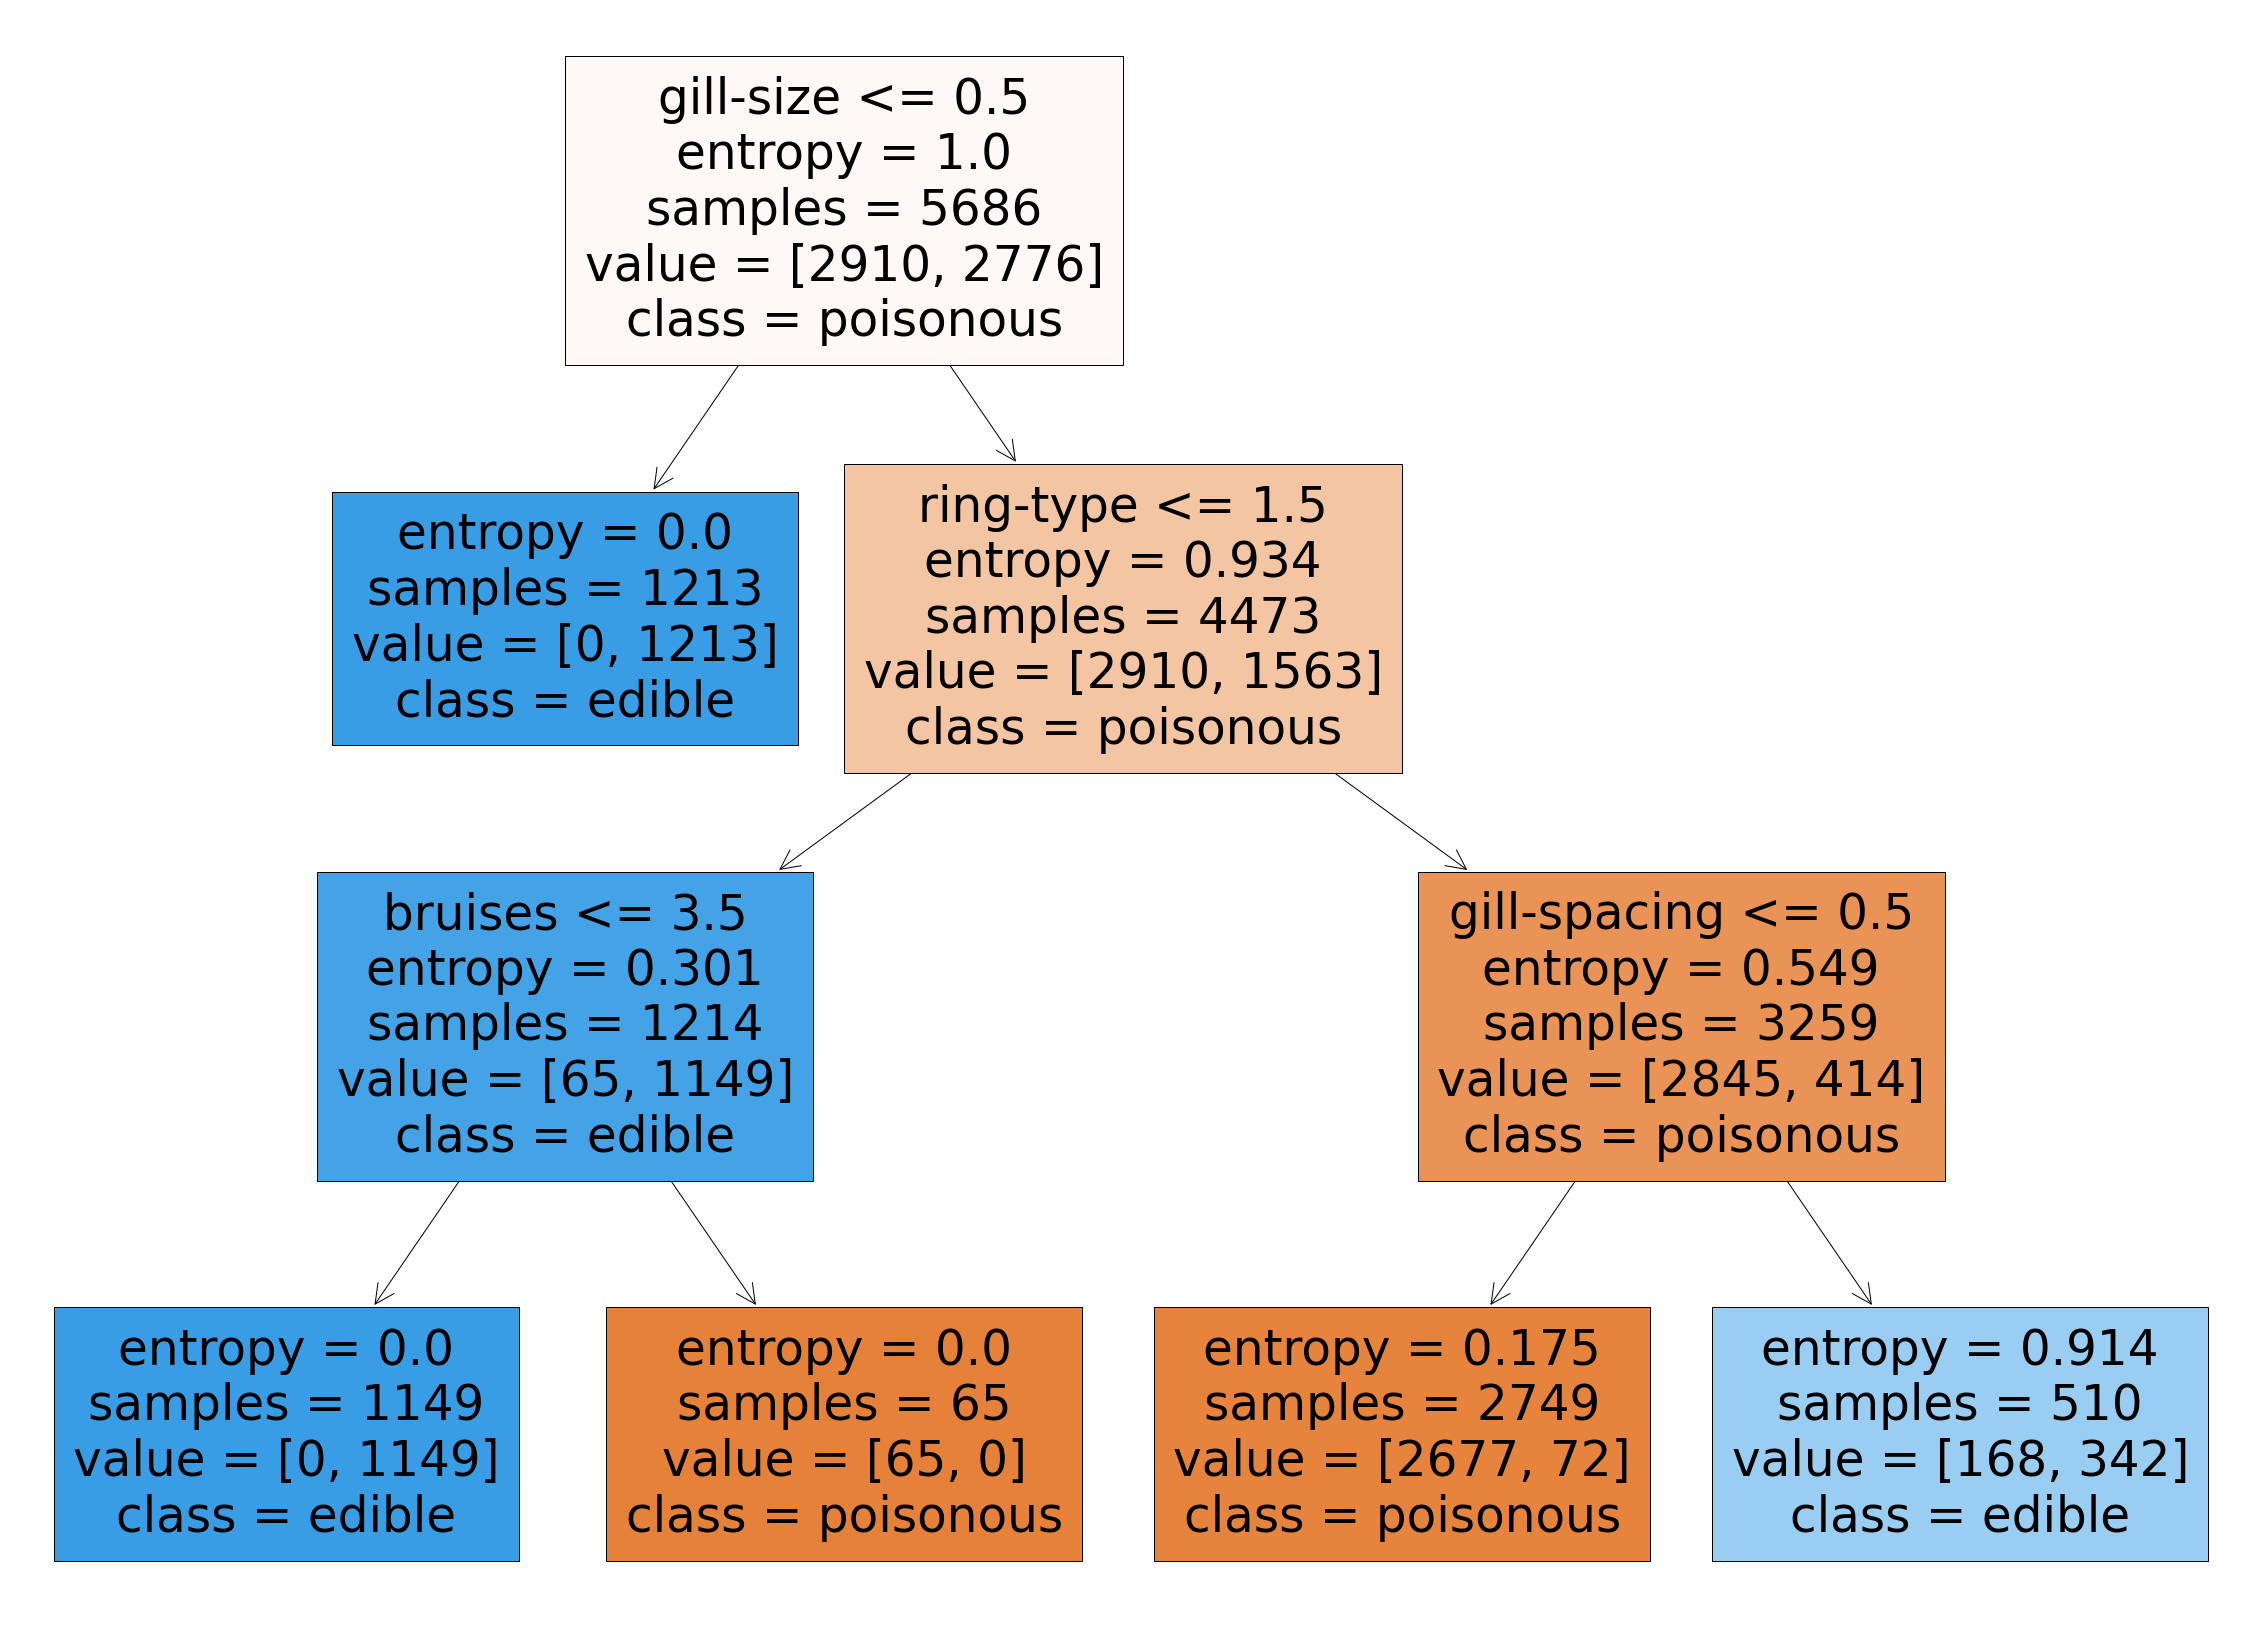

In [172]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(drugTree, 
                   feature_names=list(data),  
                   class_names=y,
                   filled=True)

Notes :
- edible -> jamur yang bisa dimakan
- poisonous -> jamur beracun, tidak bisa / dilarang untuk dimakan